In [2]:
import numpy as np
import sframe as sf
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


[INFO] Start server at: ipc:///tmp/graphlab_server-25499-1468013289 - Server binary: /Users/Mehdi/anaconda/lib/python2.7/site-packages/sframe/unity_server - Server log: /tmp/sframe_server_1468013289.log
[INFO] GraphLab Server Version: 1.8


In [2]:
All=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final.csv',skiprows=52)#,  tag,ra, dec, gl, gb, fct, ferr, nvp1, nvp1er, nvfp, nvfper, nvlim, thnv2, thnv2er, mj, lmj, mn, lmn, fspfit, efspi, fsp_p3s, efsp_p3s, spfp,spfper, splim, thsp2, thsp2er, al, aler, depol, der, rmt2, rmt2er, rm2 ,rm2er , drm2 , drm2er,format=fmt
All.print_rows(10,50)

PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.029278 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,float,float,float,float,float,float,float,float,float,float,int,float,float,float,int,float,int,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final.csv
PROGRESS: Parsing completed. Parsed 533 lines in 0.012671 secs.
+----------------+----------+-----------+-----------+-----------+---------+
|      Tag     

In [33]:
print np.median(All['Alpha_err'].to_numpy()/np.abs(All['Alpha'].to_numpy()))

0.0581395348837


In [204]:
rmer=All['RM_NS_err'].to_numpy()
rm=All['RM_NS'].to_numpy()

#print rmer
id=np.where((rmer != -1e3) & (rmer-rmer ==0))
id=id[0]
print np.median(rmer[id])

1.59


In [50]:
det=All[(All['Pi_NV_lim']==-1) & (All['Pi_SP_lim']==-1) & (All['Alpha'] >= -0.5)]
print len(det['Depol'])

5


In [51]:
print '# of steep with detected D is 315'
print '# of steep with detected PiSP and limit PiNV is 12'
print '# of steep with detected PiNV and limit PiSP is 58'
print '# of steep with limit PiNV and limit PiSP is 11'

print '# of flat with detected D is 101'
print '# of flat with detected PiNV and limit PiSP is 31'
print '# of flat with detected PiSP and limit PiNV is 0'
print '# of flat with limit PiNV and limit PiSP is 5'


# of steep with detected D is 315
# of steep with detected PiSP and limit PiNV is 12
# of steep with detected PiNV and limit PiSP is 58
# of steep with limit PiNV and limit PiSP is 11
# of flat with detected D is 101
# of flat with detected PiNV and limit PiSP is 31
# of flat with detected PiSP and limit PiNV is 0
# of flat with limit PiNV and limit PiSP is 5


In [71]:
rot=All[(All['RM_T']!=-1000) & (All['RM_NS']!=-1000) & (All['SP_pol_ang_err']-All['SP_pol_ang_err']==0)]
print np.median(np.abs(rot['RM_T']))
print len(np.abs(rot['RM_NS']))
print np.median(1.4*rot['SP_pol_ang_err'])


18.2
363
3.5966


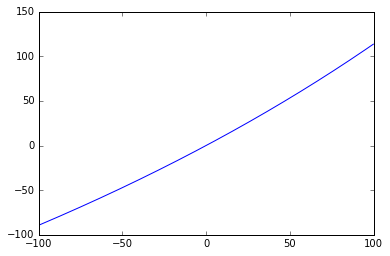

In [61]:
b=np.arange(-100,100,0.1)
drms=b+2.4
k=0.0012
a=(k+b)/(1-k*b)
fig1=plt.plot(b,a)


In [72]:
vs=2.3
vn=1.4
al=np.log10(420.0/10.0)/np.log10(vs/vn)
print al

7.52899254936


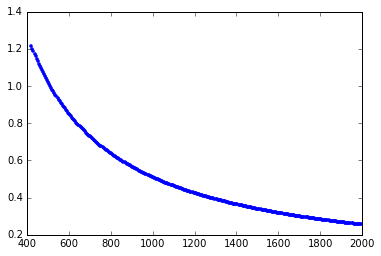

In [83]:
i=np.arange(420,2000,5)
p3sig0=100.0*5.1/i
I_SP=All['I_SP']
pisp=All['Pi_SP']
p3sig=100.0*5.1/I_SP
#fig2=plt.plot(I_SP,100.0*pisp,'g^')
fig2=plt.plot(i,p3sig0,'b.')


In [99]:
u1=np.arange(-100,100,0.1)
q1=np.arange(-100,100,0.1)
np.random.shuffle(q1)
x1=0.5*np.arctan(u1/q1)
print x1

[-0.75443779 -0.51313262 -0.72704728 ..., -0.58011448 -0.68266046
 -0.65762362]


In [44]:
new=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final_withContamination.csv',skiprows=57)#,  tag,ra, dec, gl, gb, fct, ferr, nvp1, nvp1er, nvfp, nvfper, nvlim, thnv2, thnv2er, mj, lmj, mn, lmn, fspfit, efspi, fsp_p3s, efsp_p3s, spfp,spfper, splim, thsp2, thsp2er, al, aler, depol, der, rmt2, rmt2er, rm2 ,rm2er , drm2 , drm2er,format=fmt
new.print_rows(10,56)

PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final_withContamination.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.031371 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,float,float,float,float,float,float,float,float,float,float,int,float,float,float,int,float,int,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/SPASS-NVSS-final_withContamination.csv
PROGRESS: Parsing completed. Parsed 533 lines in 0.013677 secs.
+----------------+---------

In [45]:
# This function accepts  a Numpy arrays with N elements, and make a 1D array of M*N elements with random order. 
def randomize(x,M):
    Xdeck=np.repeat(x,M,axis=0)
    np.random.shuffle(Xdeck)
    np.random.shuffle(Xdeck)
    return Xdeck

# Polarization contamination and Depolarization

(41600000,)


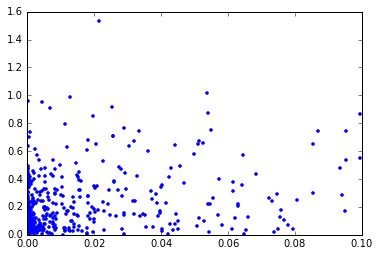

In [126]:
idgd=new[(new['Pi_SP_lim']==1) & (new['Pi_NV_lim']==1)]
num=100000
D_idgd=idgd['Depol'].to_numpy()
logD=np.absolute(np.log10(D_idgd))
pcont=idgd['P_NV_ct_frac'].to_numpy()
logD_random=randomize(logD,num)
print np.shape(logD_random)
pcont_random=randomize(pcont,num)
fig4=plt.plot(pcont,logD,'.')

In [127]:
med=np.median(pcont)
half1=logD[np.where(pcont< med)]
half2=logD[np.where(pcont>= med)]
ks_main3=stats.mstats.ks_twosamp(half1,half2)
print ks_main3
rho3, spvalue3 =stats.spearmanr(pcont,logD)
print 'Spearman rank correlation ', rho3
print 'Spearman p-value', spvalue3

(0.16826923076923081, 0.0055371468628830963)
Spearman rank correlation  0.170811354013
Spearman p-value 0.000466747623861


In [128]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(pcont)
    pconti=pcont_random[j:j+len(pcont)]
    logD1=logD_random[j:j+len(pcont)]
    medi=np.median(pconti)
    half1=logD1[np.where(pconti < medi )]
    half2=logD1[np.where(pconti >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(pconti,logD1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'

Done!


In [129]:
howmany3=np.where(ks1 >=ks_main3[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in |logD| based on P_NV_ct_frac ', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=rho3)
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |logD| for the simulation is', frac33 
print len(howmany33[0])


The simulated p-vale for the KS statistic in |logD| based on P_NV_ct_frac  0.00423
423
The simulated p-vale for the Spearman rho in |logD| for the simulation is 0.0005
50


# Sample of both pol and int contamination less than 5%
## $Pi_{SP}$ and $|log(D)|$

(32300000,)


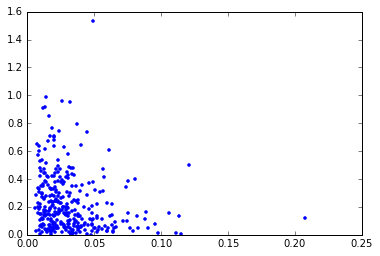

In [130]:
lowcont=new[(new['Pi_SP_lim']==1) & (new['Pi_NV_lim']==1) & (new['P_NV_ct_frac'] <=0.05) & (new['I_NV']/new['I_NV_target'] <=1.05)]
num=100000
D_lowcont=lowcont['Depol'].to_numpy()
logDlow=np.absolute(np.log10(D_lowcont))
psplow=lowcont['Pi_SP'].to_numpy()
logDlow_random=randomize(logDlow,num)
print np.shape(logDlow_random)
psplow_random=randomize(psplow,num)
fig5=plt.plot(psplow,logDlow,'.')

In [131]:
med=np.median(psplow)
half1=logDlow[np.where(psplow< med)]
half2=logDlow[np.where(psplow>= med)]
ks_main3=stats.mstats.ks_twosamp(half1,half2)
print ks_main3
rho3, spvalue3 =stats.spearmanr(psplow,logDlow)
print 'Spearman rank correlation ', rho3
print 'Spearman p-value', spvalue3

(0.24518825243462902, 0.000121487359401203)
Spearman rank correlation  -0.249428118114
Spearman p-value 5.69768010111e-06


In [132]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(psplow)
    psplowi=psplow_random[j:j+len(psplow)]
    logDlow1=logDlow_random[j:j+len(psplow)]
    medi=np.median(psplowi)
    half1=logDlow1[np.where(psplowi < medi )]
    half2=logDlow1[np.where(psplowi >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(psplowi,logDlow1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'

Done!


In [134]:
howmany3=np.where(ks1 >=ks_main3[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in |logD| based on Pi_SP ', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=np.absolute(rho3))
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |logD| for the simulation is', frac33 
print len(howmany33[0])


The simulated p-vale for the KS statistic in |logD| based on Pi_SP  8e-05
8
The simulated p-vale for the Spearman rho in |logD| for the simulation is 0.0
0


## $Pi_{SP}$ and $|log(D)|$ for only steep

(25300000,)


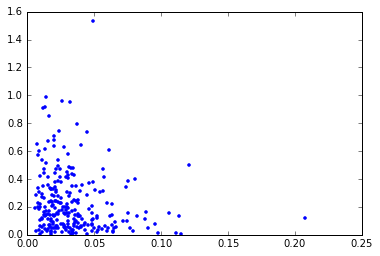

In [135]:
lowcont=new[(new['Pi_SP_lim']==1) & (new['Pi_NV_lim']==1) & (new['P_NV_ct_frac'] <=0.05) & (new['I_NV']/new['I_NV_target'] <=1.05) & (new['Alpha']<-0.5)]
num=100000
D_lowcont=lowcont['Depol'].to_numpy()
logDlow=np.absolute(np.log10(D_lowcont))
psplow=lowcont['Pi_SP'].to_numpy()
logDlow_random=randomize(logDlow,num)
print np.shape(logDlow_random)
psplow_random=randomize(psplow,num)
fig5=plt.plot(psplow,logDlow,'.')

In [136]:
med=np.median(psplow)
half1=logDlow[np.where(psplow< med)]
half2=logDlow[np.where(psplow>= med)]
ks_main3=stats.mstats.ks_twosamp(half1,half2)
print ks_main3
rho3, spvalue3 =stats.spearmanr(psplow,logDlow)
print 'Spearman rank correlation ', rho3
print 'Spearman p-value', spvalue3

(0.21016122984626912, 0.007491509142680609)
Spearman rank correlation  -0.206631857221
Spearman p-value 0.000945849030709


In [137]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(psplow)
    psplowi=psplow_random[j:j+len(psplow)]
    logDlow1=logDlow_random[j:j+len(psplow)]
    medi=np.median(psplowi)
    half1=logDlow1[np.where(psplowi < medi )]
    half2=logDlow1[np.where(psplowi >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(psplowi,logDlow1)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'
howmany3=np.where(ks1 >=ks_main3[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in |logD| based on Pi_SP ', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=np.absolute(rho3))
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |logD| for the simulation is', frac33 
print len(howmany33[0])

Done!
The simulated p-vale for the KS statistic in |logD| based on Pi_SP  0.00509
509
The simulated p-vale for the Spearman rho in |logD| for the simulation is 0.00107
107


## $I_{SP}$ vs $\pi_{SP}$ for only steep

(26400000,)


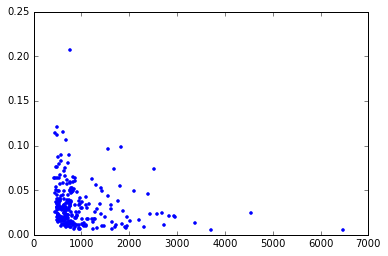

In [138]:
lowcont=new[(new['Pi_SP_lim']==1) & (new['P_NV_ct_frac'] <=0.05) & (new['I_NV']/new['I_NV_target'] <=1.05) & (new['Alpha']<-0.5)]
original=new[(new['Pi_NV_lim']==1) & (new['RM_T']!=-1000) & (new['MedRM_T']!=-1000)]
num=100000
var1=lowcont['I_SP'].to_numpy()
var2=lowcont['Pi_SP'].to_numpy()
var1_random=randomize(var1,num)
print np.shape(var1_random)
var2_random=randomize(var2,num)
fig5=plt.plot(var1,var2,'.')

In [139]:
med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main3=stats.mstats.ks_twosamp(half1,half2)
print ks_main3
rho3, spvalue3 =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho3
print 'Spearman p-value', spvalue3

(0.2348484848484847, 0.0013779535019942204)
Spearman rank correlation  -0.284035753674
Spearman p-value 2.73086924849e-06


In [140]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var1i=var1_random[j:j+len(var1)]
    var21=var2_random[j:j+len(var1)]
    medi=np.median(var1i)
    half1=var21[np.where(var1i < medi )]
    half2=var21[np.where(var1i >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var1i,var21)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'
howmany3=np.where(ks1 >=ks_main3[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in I_SP based on Pi_SP ', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=np.absolute(rho3))
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in Pi_SP for the simulation is', frac33 
print len(howmany33[0])

Done!
The simulated p-vale for the KS statistic in I_SP based on Pi_SP  0.00097
97
The simulated p-vale for the Spearman rho in Pi_SP for the simulation is 0.0
0


## $|\Delta RM|$ vs $|log(D)|$

(28300000,)


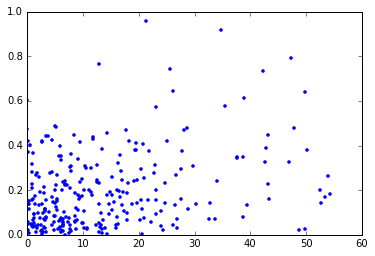

In [141]:
lowcont=new[(new['Pi_SP_lim']==1) & (new['Pi_NV_lim']==1) & (new['P_NV_ct_frac'] <=0.05) & (new['I_NV']/new['I_NV_target'] <=1.05) & (new['RM_T']!=-1000)]
num=100000
var2=lowcont['Depol'].to_numpy()
var2=np.absolute(np.log10(var2))
var1=np.absolute(lowcont['DeltaRM'].to_numpy())
var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)
fig5=plt.plot(var1,var2,'.')

In [142]:
med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main3=stats.mstats.ks_twosamp(half1,half2)
print ks_main3
rho3, spvalue3 =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho3
print 'Spearman p-value', spvalue3

(0.22225551892917836, 0.001842717276121876)
Spearman rank correlation  0.251708143421
Spearman p-value 1.82876742843e-05


In [143]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var1i=var1_random[j:j+len(var1)]
    var21=var2_random[j:j+len(var1)]
    medi=np.median(var1i)
    half1=var21[np.where(var1i < medi )]
    half2=var21[np.where(var1i >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var1i,var21)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'
howmany3=np.where(ks1 >=ks_main3[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in |DeltaRM| based on |log(D)| ', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=np.absolute(rho3))
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |log(D)| for the simulation is', frac33 
print len(howmany33[0])

Done!
The simulated p-vale for the KS statistic in |DeltaRM| based on |log(D)|  0.00103
103
The simulated p-vale for the Spearman rho in |log(D)| for the simulation is 3e-05
3


## $|RRM_T|$ vs $\pi_{NV}$

In [202]:
lowcont=new[(new['Pi_NV_lim']==1) & (new['P_NV_ct_frac'] <=0.1) & (new['I_NV']/new['I_NV_target'] <=1.1) & (new['RM_T']!=-1000) & (new['MedRM_T']!=-1000)]
original=new[(new['Pi_NV_lim']==1) & (new['RM_T']!=-1000) & (new['MedRM_T']!=-1000)]
num=100000
org2=original['Pi_NV'].to_numpy()
org1=np.absolute((original['RM_T']-original['MedRM_T']).to_numpy())
var2=lowcont['Pi_NV'].to_numpy()
pval=lowcont['I_NV'].to_numpy()*var2
var1=np.absolute((lowcont['RM_T']-lowcont['MedRM_T']).to_numpy())
var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)

(33200000,)


In [180]:
print np.median(lowcont['n_ct'])
#fig=plt.hist(new['P_NV_ct_frac'],bins=20)

4.0


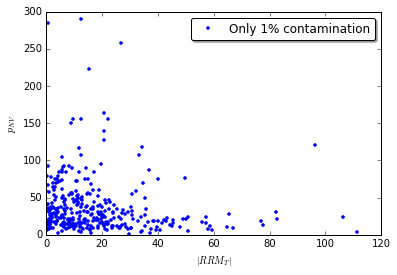

In [203]:
#fig5=plt.plot(org1,org2,'.r',label='Original sample')
fig5=plt.plot(var1,pval,'.b',label='Only 1% contamination')
plt.xlabel(r'$|RRM_T|$')
plt.ylabel(r'$p_{NV}$')
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True,numpoints=1)
plt.savefig('RRMT_PiNV.png')

In [176]:
med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main3=stats.mstats.ks_twosamp(half1,half2)
print ks_main3
rho3, spvalue3 =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho3
print 'Spearman p-value', spvalue3

(0.17815126050420169, 0.64428922268060507)
Spearman rank correlation  -0.35191055202
Spearman p-value 0.00302423184718


In [146]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var1i=var1_random[j:j+len(var1)]
    var21=var2_random[j:j+len(var1)]
    medi=np.median(var1i)
    half1=var21[np.where(var1i < medi )]
    half2=var21[np.where(var1i >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var1i,var21)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'
howmany3=np.where(ks1 >=ks_main3[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T| ', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=np.absolute(rho3))
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is', frac33 
print len(howmany33[0])

Done!
The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T|  0.4332
43320
The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is 0.0489
4890


## $|\Delta RM|$ vs $\pi_{SP}$


(28600000,)


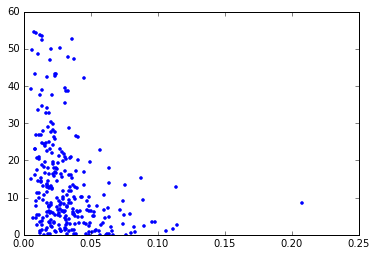

In [154]:
lowcont=new[(new['Pi_SP_lim']==1) & (new['P_NV_ct_frac'] <=0.05) & (new['I_NV']/new['I_NV_target'] <=1.05) & (new['DeltaRM']!=-1000)]
num=100000
var1=lowcont['Pi_SP'].to_numpy()
var2=np.absolute(lowcont['DeltaRM'].to_numpy())
var2_random=randomize(var2,num)
print np.shape(var2_random)
var1_random=randomize(var1,num)
fig5=plt.plot(var1,var2,'.')

In [155]:
med=np.median(var1)
half1=var2[np.where(var1< med)]
half2=var2[np.where(var1>= med)]
ks_main3=stats.mstats.ks_twosamp(half1,half2)
print ks_main3
rho3, spvalue3 =stats.spearmanr(var1,var2)
print 'Spearman rank correlation ', rho3
print 'Spearman p-value', spvalue3

(0.3146853146853148, 1.4159753369123343e-06)
Spearman rank correlation  -0.394062523427
Spearman p-value 4.61593983074e-12


In [156]:
ks1=np.zeros(num)-1
pval=np.zeros(num)-1
rho=np.zeros(num)-1
sp_value=np.zeros(num)-1
for i in range(num):
    j=i*len(var1)
    var1i=var1_random[j:j+len(var1)]
    var21=var2_random[j:j+len(var1)]
    medi=np.median(var1i)
    half1=var21[np.where(var1i < medi )]
    half2=var21[np.where(var1i >= medi)]
    res=stats.mstats.ks_twosamp(half1,half2)
    ks1[i]=res[0]
    pval[i]=res[1]
    res2=stats.spearmanr(var1i,var21)
    rho[i] =res2[0]
    sp_value[i]=res2[1]

print 'Done!'
howmany3=np.where(ks1 >=ks_main3[0])
frac3=len(howmany3[0])/float(num)
print 'The simulated p-vale for the KS statistic in Pi_SP based on |DeltaRM| ', frac3 
print len(howmany3[0])

howmany33=np.where(np.absolute(rho) >=np.absolute(rho3))
frac33=len(howmany33[0])/float(num)
print 'The simulated p-vale for the Spearman rho in |DeltaRM| for the simulation is', frac33 
print len(howmany33[0])

Done!
The simulated p-vale for the KS statistic in Pi_SP based on |DeltaRM|  0.0
0
The simulated p-vale for the Spearman rho in |DeltaRM| for the simulation is 0.0
0


# How did I choose 10% threshold for polarization contamination?


In [176]:
#readcol,'Larry_contamination.txt',fz, ictz, pz, pctz, ispz, pspz
pol=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/main/Larry_contamination.txt',skiprows=1,delimiter=' ',header=False)
Inv=pol['X1'].to_numpy()
Ict=pol['X2'].to_numpy()
Pnv=pol['X3'].to_numpy()
Pct=pol['X4'].to_numpy()
Isp=pol['X5'].to_numpy()
Psp=pol['X6'].to_numpy()

PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/Larry_contamination.txt
PROGRESS: Parsing completed. Parsed 100 lines in 0.008935 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/main/Larry_contamination.txt
PROGRESS: Parsing completed. Parsed 729 lines in 0.010177 secs.


In [184]:
id=np.where(np.absolute(Pct/Pnv) < 0.1)
len(id[0])

540

In [185]:
print 533.0/729.0

0.731138545953


In [192]:
print np.median(Pct/Pnv)
print np.percentile(Pct/Pnv,84)

0.000435919790759
0.160826049177


In [198]:
print np.percentile(Ict[id[0]]/Inv[id[0]],74)

0.0257879840221


# New figures

In [200]:
newrm=new[new['DeltaRM']!=-1000]
len(newrm['RM_T'])

364

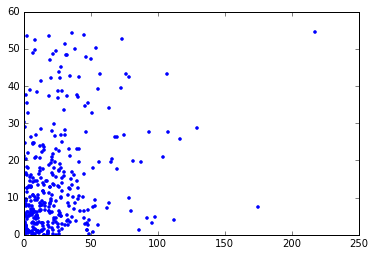

In [201]:
fig6=plt.plot(np.absolute(newrm['RM_T'].to_numpy()),np.absolute(newrm['DeltaRM'].to_numpy()),'.')

## The uncertainty on the RM if we use the two S-PASS sub-bands

In [9]:
l1=0.12690355329949238
l2= 0.13416815742397137
sigRM=5.0*3.14/180.0/(l2**2-l1**2)
print 'Uncertainty on the RM in rad/m^2 based on DeltaX=5 degrees is ', sigRM, 'rad m^-2'

Uncertainty on the RM in rad/m^2 based on DeltaX=5 degrees is  45.9891496438 rad m^-2


In [26]:
print np.median(All[All['RM_NS_err'] >=0 ]['RM_NS_err'].to_numpy())


1.59


In [36]:
delX=5.6*2.0*3.14/180.0
nvl1=0.20904466587694237
nvl2=0.2197963220748773
delRM=delX/(nvl2**2-nvl1**2)
print delRM

42.3743948555


In [78]:
import math
Q31=All[(All['RM_T']!= -1000) & (All['MedRM_T'] != -1000)] 
id=np.where((np.absolute(Q31['RM_T'].to_numpy()-Q31['MedRM_T'].to_numpy()) <= 20) & (np.absolute(np.log10(Q31['Depol'].to_numpy())) >=0.4))

In [82]:
print np.absolute(Q31['DeltaRM'].to_numpy()[id[0]])

[  1.63000000e+00   3.00000000e-02   5.14000000e+00   3.89400000e+01
   8.31000000e+00   3.00000000e-02   1.29200000e+01   9.27000000e+00
   1.77000000e+01   2.50100000e+01   3.72000000e+00   4.22300000e+01
   2.00000000e-01   1.43400000e+01   2.67800000e+01   1.81700000e+01
   4.93000000e+00   1.44100000e+01   2.12400000e+01   9.50000000e+00
   3.38000000e+00]


In [21]:
dep=All[(All['Pi_SP_lim']== 1) & (All['Pi_NV_lim']== 1) & (All['Depol']>= 1.7)]
rep=All[(All['Pi_SP_lim']== 1) & (All['Pi_NV_lim']== 1) & (All['Depol']<= 0.6)]
nodep=All[(All['Pi_SP_lim']== 1) & (All['Pi_NV_lim']== 1) & (All['Depol']< 1.7) & (All['Depol']> 0.6)]

In [40]:
print np.median(dep['Alpha']), ' +- ', (np.percentile(dep['Alpha'],[16,84])-np.median(dep['Alpha']))/np.sqrt(len(dep['Alpha']))
print np.median(nodep['Alpha']), ' +- ', (np.percentile(nodep['Alpha'],[16,84])-np.median(nodep['Alpha']))/np.sqrt(len(nodep['Alpha']))
print np.median(rep['Alpha']), ' +- ', (np.percentile(rep['Alpha'],[16,84])-np.median(rep['Alpha']))/np.sqrt(len(rep['Alpha']))

-0.925  +-  [-0.02443484  0.03320542]
-0.82  +-  [-0.02245251  0.03482064]
-0.11  +-  [-0.14005469  0.13157577]


## Simulation to understand the effect of contamination
##### As we showed repeating some of the statistical tests for a sample with contamination both in I and P less than 5% resulted in larger p-values. These results are either due to the lower statistics or due to bias because of contamination. To resolve this issue we have designed a test.
Assuming there are N objects for a correlation test. Reducing the contamination threshold to the 5% resulted in only M sources. I randomly will draw M sources from the original sample of N objects without replacement. Then I perform the KS and Spearman test on the resulting sample. I repeat these steps 10000 times and draw a distribution of the p-values.
If reducing the number of sources results in lower statistics and therefore weaker correlations then I expect the p-value distribution to be off from the original sample P-value. However, if there are biasing effects due to contamination I expect the p-value distribution to be centered around the original p-value.

## $|RRM_T|$ vs $\pi_{NV}$

In [104]:
# I have draw 283 sources
test=new[(new['Pi_NV_lim']==1) & (new['RM_T']!=-1000) & (new['MedRM_T']!=-1000)]
Pinv=test['Pi_NV'].to_numpy()
RRMT=np.absolute((test['RM_T']-test['MedRM_T']).to_numpy())
num2=20
pks=np.zeros(num2)-100
psp=np.zeros(num2)-100
for l in range(num2):
    print l
    idrandom=np.int_(np.random.rand(283)*355)
    num=100000
    var2=Pinv[idrandom]
    var1=RRMT[idrandom]
    var2_random=randomize(var2,num)
    #print np.shape(var2_random)
    var1_random=randomize(var1,num)
    #fig5=plt.plot(var1,var2,'.')

    med=np.median(var1)
    half1=var2[np.where(var1< med)]
    half2=var2[np.where(var1>= med)]
    ks_main3=stats.mstats.ks_twosamp(half1,half2)
    print ks_main3
    rho3, spvalue3 =stats.spearmanr(var1,var2)
    print 'Spearman rank correlation ', rho3
    print 'Spearman p-value', spvalue3

    ks1=np.zeros(num)-1
    pval=np.zeros(num)-1
    rho=np.zeros(num)-1
    sp_value=np.zeros(num)-1
    for i in range(num):
        j=i*len(var1)
        var1i=var1_random[j:j+len(var1)]
        var21=var2_random[j:j+len(var1)]
        medi=np.median(var1i)
        half1=var21[np.where(var1i < medi )]
        half2=var21[np.where(var1i >= medi)]
        res=stats.mstats.ks_twosamp(half1,half2)
        ks1[i]=res[0]
        pval[i]=res[1]
        res2=stats.spearmanr(var1i,var21)
        rho[i] =res2[0]
        sp_value[i]=res2[1]

        #print 'Done!'
    howmany3=np.where(ks1 >=ks_main3[0])
    frac3=len(howmany3[0])/float(num)
    pks[l]=frac3
    print 'The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T| ', frac3 
    print len(howmany3[0])

    howmany33=np.where(np.absolute(rho) >=np.absolute(rho3))
    frac33=len(howmany33[0])/float(num)
    psp[l]=frac33
    print 'The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is', frac33 
    print len(howmany33[0])
print 'DONE'

0
(0.20032963739886098, 0.0068366679549080227)
Spearman rank correlation  -0.229852349747
Spearman p-value 9.54124471091e-05
The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T|  0.00511
511
The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is 4e-05
4
1
(0.19010494752623691, 0.012064127400321376)
Spearman rank correlation  -0.192773331504
Spearman p-value 0.00111719161517
The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T|  0.00832
832
The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is 0.00123
123
2
(0.25791629207871325, 0.00016338022043594738)
Spearman rank correlation  -0.246355269724
Spearman p-value 2.78018471399e-05
The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T|  2e-05
2
The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is 2e-05
2
3
(0.17825392068724355, 0.022306343207067609)
Spearman rank correlation  -0.22902512497
Spearman p-value 0.00010126432122
The simulate

In [105]:
#pks1=pks
#psp1=psp

In [106]:
print pks

[  5.11000000e-03   8.32000000e-03   2.00000000e-05   1.68800000e-02
   2.76000000e-03   1.85900000e-01   2.80000000e-04   3.85000000e-03
   3.07000000e-02   4.21800000e-02   3.29700000e-02   4.00000000e-05
   5.28000000e-03   4.52000000e-03   5.60000000e-04   1.25100000e-02
   1.03700000e-02   1.22000000e-03   2.00000000e-05   1.96000000e-03]


In [107]:
print psp

[  4.00000000e-05   1.23000000e-03   2.00000000e-05   9.00000000e-05
   1.50000000e-04   8.50000000e-03   0.00000000e+00   6.00000000e-05
   4.00000000e-05   5.51000000e-03   4.67000000e-03   0.00000000e+00
   3.00000000e-05   2.00000000e-05   0.00000000e+00   9.00000000e-05
   2.26000000e-03   3.70000000e-04   0.00000000e+00   7.00000000e-05]


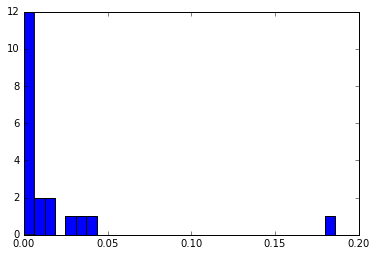

In [120]:
bin=(np.max(pks)-np.min(pks))/10.0
fig6=plt.hist(pks,bins=30,label='KS-p-value')
#plt.axis([0,8e-2,0,10])

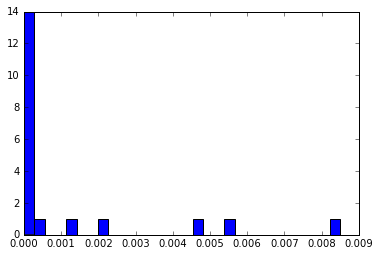

In [122]:
bin=(np.max(psp)-np.min(psp))/10.0
fig7=plt.hist(psp,bins=30,label='Spearman p-value')
#plt.axis([0,2e-4,0,100])

In [125]:
print np.median(pks)
print np.median(psp)


0.004815
6.5e-05


In [93]:
test=new[(new['Pi_NV_lim']==1) & (new['RM_T']!=-1000) & (new['MedRM_T']!=-1000)]
Pinv=test['Pi_NV'].to_numpy()
RRMT=np.absolute((test['RM_T']-test['MedRM_T']).to_numpy())

In [95]:
RRMT

array([  22.6 ,    2.4 ,   20.5 ,    7.8 ,    9.4 ,    1.8 ,    5.7 ,
         19.9 ,   11.  ,   57.3 ,    2.55,    6.8 ,    8.2 ,    4.  ,
          5.5 ,    7.  ,    1.5 ,   15.85,   31.2 ,    1.2 ,   41.75,
          9.75,   12.75,   15.6 ,   13.4 ,   38.1 ,    6.5 ,    5.7 ,
         17.1 ,    5.5 ,  106.5 ,   33.9 ,   14.5 ,    2.75,    4.3 ,
          1.35,   20.65,   21.3 ,    1.3 ,    2.8 ,   12.8 ,   16.9 ,
         27.  ,   11.35,   14.5 ,    0.6 ,   30.4 ,   23.5 ,   34.4 ,
         23.4 ,   19.15,   29.4 ,    4.6 ,   45.1 ,   44.35,   10.6 ,
         12.8 ,    5.75,    0.8 ,   23.8 ,   14.85,    1.1 ,   39.4 ,
          6.2 ,   20.4 ,    3.8 ,   50.65,   59.25,   14.6 ,   15.1 ,
          9.3 ,   42.2 ,    5.85,    9.45,    0.15,   17.2 ,   76.8 ,
         27.25,    5.9 ,   36.3 ,    8.6 ,   29.4 ,    2.45,   11.8 ,
         30.85,    1.7 ,   19.6 ,   12.8 ,    1.05,    8.6 ,    4.1 ,
          9.3 ,    9.5 ,    0.25,    3.45,    8.3 ,   19.5 ,   18.4 ,
         13.3 ,    4

In [182]:
# I have draw 283 sources
test=new[(new['Pi_NV_lim']==1) & (new['RM_T']!=-1000) & (new['MedRM_T']!=-1000)]
Pinv=test['Pi_NV'].to_numpy()
RRMT=np.absolute((test['RM_T']-test['MedRM_T']).to_numpy())
num2=20
pks=np.zeros(num2)-100
psp=np.zeros(num2)-100
for l in range(num2):
    print l
    idrandom=np.int_(np.random.rand(325)*355)
    num=100000
    var2=Pinv[idrandom]
    var1=RRMT[idrandom]
    var2_random=randomize(var2,num)
    #print np.shape(var2_random)
    var1_random=randomize(var1,num)
    #fig5=plt.plot(var1,var2,'.')

    med=np.median(var1)
    half1=var2[np.where(var1< med)]
    half2=var2[np.where(var1>= med)]
    ks_main3=stats.mstats.ks_twosamp(half1,half2)
    print ks_main3
    rho3, spvalue3 =stats.spearmanr(var1,var2)
    print 'Spearman rank correlation ', rho3
    print 'Spearman p-value', spvalue3

    ks1=np.zeros(num)-1
    pval=np.zeros(num)-1
    rho=np.zeros(num)-1
    sp_value=np.zeros(num)-1
    for i in range(num):
        j=i*len(var1)
        var1i=var1_random[j:j+len(var1)]
        var21=var2_random[j:j+len(var1)]
        medi=np.median(var1i)
        half1=var21[np.where(var1i < medi )]
        half2=var21[np.where(var1i >= medi)]
        res=stats.mstats.ks_twosamp(half1,half2)
        ks1[i]=res[0]
        pval[i]=res[1]
        res2=stats.spearmanr(var1i,var21)
        rho[i] =res2[0]
        sp_value[i]=res2[1]

        #print 'Done!'
    howmany3=np.where(ks1 >=ks_main3[0])
    frac3=len(howmany3[0])/float(num)
    pks[l]=frac3
    print 'The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T| ', frac3 
    print len(howmany3[0])

    howmany33=np.where(np.absolute(rho) >=np.absolute(rho3))
    frac33=len(howmany33[0])/float(num)
    psp[l]=frac33
    print 'The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is', frac33 
    print len(howmany33[0])
print 'DONE'

0
(0.13690070438536747, 0.09513345197090238)
Spearman rank correlation  -0.246596076396
Spearman p-value 6.85637231889e-06
The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T|  0.07487
7487
The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is 0.0
0
1
(0.33994849265262833, 1.3995058160118715e-08)
Spearman rank correlation  -0.350082857945
Spearman p-value 8.38519187246e-11
The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T|  0.0
0
The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is 0.0
0
2
(0.18075437400590788, 0.0098920286755274176)
Spearman rank correlation  -0.198651977772
Spearman p-value 0.000314047180661
The simulated p-vale for the KS statistic in Pi_NV based on |RRM_T|  0.00761
761
The simulated p-vale for the Spearman rho in |RRM_T| for the simulation is 0.00032
32
3
(0.27489964402029837, 9.287590728442341e-06)
Spearman rank correlation  -0.332117090427
Spearman p-value 8.28378876461e-10
The simulated p

In [184]:
print np.median(pks)
print np.median(psp)

0.000585
0.0


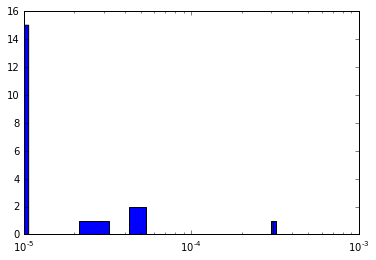

In [194]:
bin=(np.max(psp)-np.min(psp))/10.0
fig7=plt.hist(psp,bins=30,label='Spearman p-value')
plt.xscale("log")

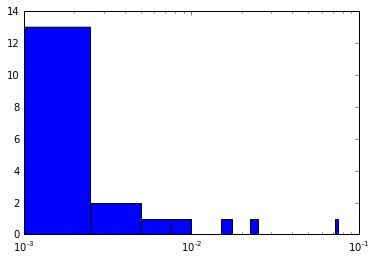

In [193]:
bin=(np.max(pks)-np.min(pks))/100.0
fig6=plt.hist(pks,bins=30,label='KS-p-value')
plt.xscale("log")

In [209]:
print np.median(All['I_SP']),np.median(All['I_SP_err']),np.median(All['I_NV']),np.median(All['I_NV_err'])

733.84 11.42 1057.46 33.2


## Fixing the lmn and lmj column and checking the new "SPASS-NVSS-V2.csv"

In [17]:
All1=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/Paper_shared_Larry/ToSubmit/SPASS-NVSS.csv',header=False)#,  tag,ra, dec, gl, gb, fct, ferr, nvp1, nvp1er, nvfp, nvfper, nvlim, thnv2, thnv2er, mj, lmj, mn, lmn, fspfit, efspi, fsp_p3s, efsp_p3s, spfp,spfper, splim, thsp2, thsp2er, al, aler, depol, der, rmt2, rmt2er, rm2 ,rm2er , drm2 , drm2er,format=fmt
All2=sf.SFrame.read_csv('/Users/Mehdi/Dropbox/SPASS/SPASS-NVSS-V2.csv',header=False)#,  tag,ra, dec, gl, gb, fct, ferr, nvp1, nvp1er, nvfp, nvfper, nvlim, thnv2, thnv2er, mj, lmj, mn, lmn, fspfit, efspi, fsp_p3s, efsp_p3s, spfp,spfper, splim, thsp2, thsp2er, al, aler, depol, der, rmt2, rmt2er, rm2 ,rm2er , drm2 , drm2er,format=fmt


PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/Paper_shared_Larry/ToSubmit/SPASS-NVSS.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.024783 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,float,float,float,float,float,float,float,float,float,float,int,float,float,float,int,float,int,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float,float,float,float,int,float,float,float,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/Paper_shared_Larry/ToSubmit/SPASS-NVSS.csv
PROGRESS: Parsing completed. Parsed 533 lines in 0.011698 secs.
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/SPASS/SPASS-NVSS

In [237]:
res16=All1['X16']+All2['X16']
res16.to_numpy()
print res16[-500:-400]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [247]:
res18=All1['X18']+All2['X18']
res18.to_numpy()
print res18[433:533]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
All2

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
J043736-295405,69.40246,-29.90147,230.26648,-40.7423,1124.77,38.2,34.1,0.3,0.0303,0.0011,1
J043300-295613,68.25158,-29.93694,230.05385,-41.72754,1116.89,36.4,63.66,0.3,0.057,0.0019,1
J045514-300647,73.80962,-30.11311,231.56537,-37.0562,3446.27,107.6,140.08,0.32,0.0406,0.0013,1
J001035-302745,2.64867,-30.46275,10.08143,-80.45551,347.27,9.5,2.87,0.31,0.0083,0.0009,1
J235935-313341,359.8978,-31.56164,8.40692,-77.87329,350.48,10.4,5.21,0.29,0.0149,0.0009,1
J001259-395425,3.24979,-39.90714,332.45776,-74.93929,493.6,17.4,12.24,0.31,0.0248,0.0011,1
J000020-322059,0.08471,-32.34972,4.64173,-77.75222,520.9,15.6,1.16,0.31,0.0022,0.0006,1
J010403-395023,16.01592,-39.83972,292.08127,-77.02134,850.21,24.1,102.35,0.35,0.1204,0.0034,1
J001217-332157,3.07483,-33.36606,354.11316,-79.5038,857.65,25.5,22.3,0.31,0.026,0.0009,1
J010925-344715,17.35683,-34.78758,277.33636,-81.42731,1020.57,30.6,8.8,0.24,0.0086,0.0003,1


In [29]:
med= All2['X39'].to_numpy()
id=np.where(med > 0)

In [33]:
print np.argmin(med[id])

54


In [34]:
All2['X13']

dtype: float
Rows: 533
[-43.445, -89.5095, -83.8585, 62.0097, -45.4939, -66.5239, -14.6659, 85.2145, -82.4367, -8.6207, 64.2203, -13.6426, -83.1072, 12.2603, 26.3997, -24.0813, -89.9204, 82.8141, 7.1885, -69.7181, -13.2184, 85.5728, -25.4614, 71.0369, 14.6975, 60.8941, 76.2334, -71.8799, 38.2048, 21.7633, -73.5392, 74.8434, -2.2834, 38.2353, -89.2718, 40.5002, -26.3618, -10.3008, 49.8981, -58.5125, 47.0958, 36.8025, -61.4085, 62.2934, 26.611, 9.0173, -86.5925, 24.0341, None, -52.2716, 45.5985, 82.5564, 36.3061, -64.5652, 27.5839, 10.0018, 5.0204, 14.2445, 1.9145, -53.6257, 60.1494, -61.8512, 54.2175, 68.2498, -77.4325, -27.3466, 33.3878, 84.3016, 9.1349, -4.9593, -22.1933, 45.2287, 16.9372, 15.4387, 75.1212, -25.866, 10.9185, -62.9245, 18.5146, 75.0929, 43.7003, -12.4548, None, 79.1868, -37.6582, -35.8446, 49.3372, 10.3521, -78.049, -15.4587, -1.819, 82.5948, -79.8189, -6.6897, 57.9271, 76.6039, 74.0615, 77.6517, 18.7926, -1.6043, ... ]